<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/CED_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Canales de youtube que vimos en la AAA: 

* https://www.youtube.com/watch?v=KC4VqYCmiUo
* blog: https://towardsdatascience.com/
* https://www.youtube.com/watch?v=-XxZGvNClkg



---



# Pruebas de bondad de ajuste (Pruebas de hipótesis)

Permiten verificar que una población de la cual proviene una muestra tiene una distribución especificada o supuesta.

--> lo que buscamos es comparar las frecuencias reales en cada categoría con las frecuencias que teóricamente se esperarían si los datos siguieran una distribución específica de probabilidad (bondad del ajuste de un grupo de datos).

* En general, se plantea una hipótesis que se debe verificar (hipótesis nula), cuya validez depende del cumplimiento del estadístico de la prueba. 
* La finalidad de la prueba es determinar si el conjunto de datos se ajusta a una determinada distribución de manera especificiada (hipótesis simple) o si pertenece a la clase paramétrica (hipótesis compuesta). 
* Chi-cuadrado y Kolmogorov-Smirnov son las más comunes

# Hipótesis


* Una hipótesis es una proposición que puede o no ser verdadera pero que se adopta provisionalmente hasta recabar información que sugiera lo contrario
* Se usan para evaluar el grado de inconsistencia


> * Hipótesis nula: indica la distribución propuesta --> **Ho: f(x) = f0(x)**


> * Hipótesis alternativa: indica que la variable en estudio tiene una distribución que no se ajusta a la propuesta --> **H1: f(x) != f0(x)**





# Pruebas estadísticas

* Paramétricas: distribución normal; intervalo o razón; muestra grande (>30); muestra aleatoria; (algunas de las más usadas son tstudent y anova)
* No paramétricas: distribución libre; nivel de medición nominal u ordinal; muestra pequeña (<30); muestra no aleatoria (a conveniencia); la más usada es chi-cuadrada. 

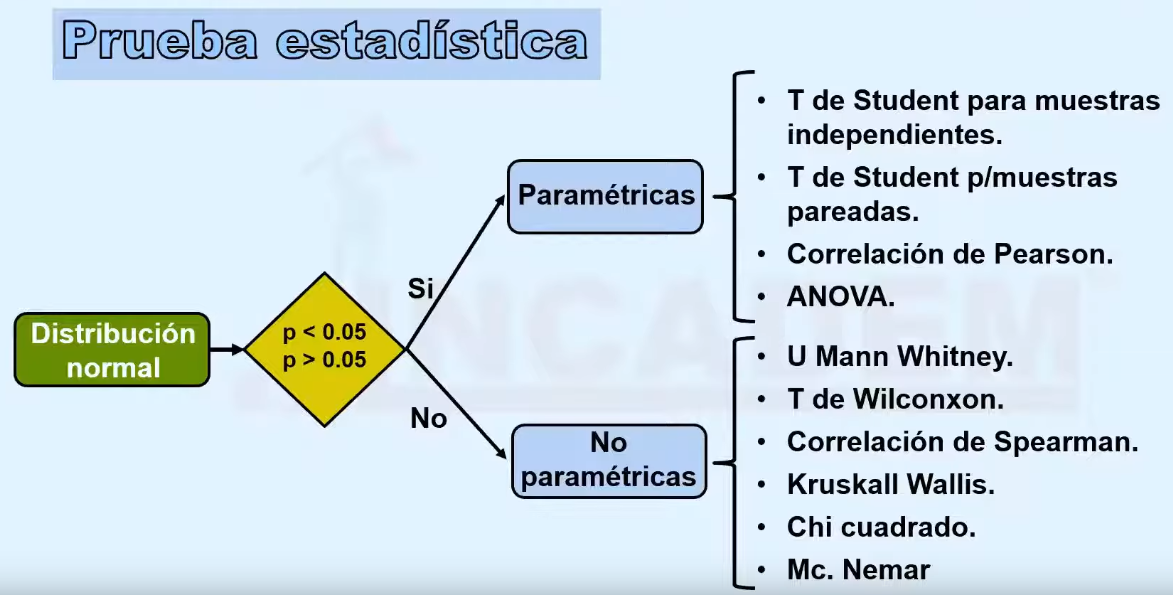

# Prueba Chi-cuadrada (ji cuadrada)

* Es una de las más famosas y usadas en estadística --> flexibilidad
* Es una prueba no paramétrica --> los datos con los que podemos trabajar son de naturaleza nominal (categóricas, es decir, variables que toman un número limitado de valores ) 
* Los datos deben estar distribuidos en términos de frecuencias (tabulados en forma nxn)
* Se usa para evaluar diferencias en grupos no relacionados (diferentes características) --> Ejemplo: hombres y mujeres (Sexo), etc. 
* Los datos pueden seguir una distribución libre (no necesariamente normal)

Formalmente, se define como la suma de los cuadrados de n variables que están normalmente distribuidas con media 0 y desviación estándar 1

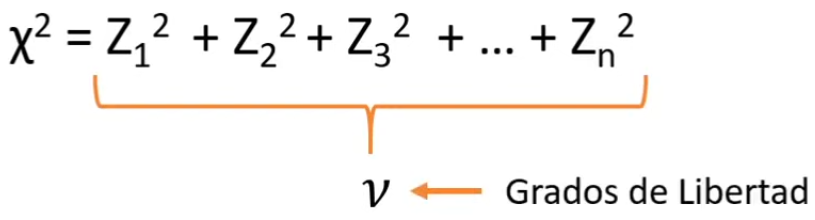


--> a esta distribución la parametriza los grados de libertad

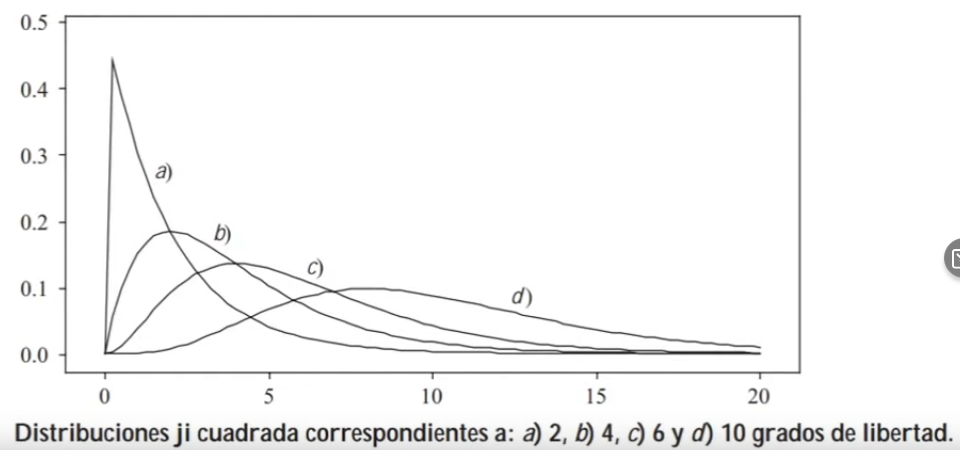


* El área bajo la curva (hasta eje x, siguiendo la lógica de las distribuciones de probabilidad) es 1. 

* Tabla chi-cuadrado: http://labrad.fisica.edu.uy/docs/tabla_chi_cuadrado.pdf

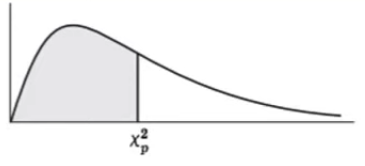


# Frecuencias observadas y frecuencias teóricas

* Tomemos como ejemplo el lanzamiento de una moneda en 100 repeticiones--> se esperaría que salieran 50 "caras" y 50 "sellos" (Frecuencia teórica)
* Sin embargo, se podrían obtener resultados como 48 "caras" y 52 "sellos", etc. (Frecuencia observada) 

In [ ]:
import random
random.seed(1) #semilla
posibilidades = ["cara", "sello"]
for i in range(10):
  print(random.choice(posibilidades))

cara
cara
sello
cara
sello
sello
sello
sello
cara
cara


In [ ]:
posibilidades = ["cara", "sello"]
prueba_i = [random.choice(posibilidades) for i in range(5)] #list comprehension

print(prueba_i)
print(prueba_i[-2])

['sello', 'cara', 'sello', 'cara', 'sello']
cara


In [ ]:
import random
import pandas as pd
posibilidades = ["cara", "sello", "cara"]
pruebas = []
for i in range(10):
  prueba_i = [random.choice(posibilidades) for j in range(100)] #list comprehension
  pruebas.append(prueba_i)

data = []
for idx, prueba in enumerate(pruebas):
  data.append((f"prueba_{idx+1}",prueba.count("cara"), prueba.count("sello")))
df = pd.DataFrame(data, columns=["prueba", "num_cara", "num_sello"])
df

,prueba,num_cara,num_sello
0,prueba_1,59,41
1,prueba_2,55,45
2,prueba_3,59,41
3,prueba_4,46,54
4,prueba_5,45,55
5,prueba_6,43,57
6,prueba_7,50,50
7,prueba_8,51,49
8,prueba_9,50,50
9,prueba_10,53,47


In [ ]:
data

[('prueba_1', 45, 55),
 ('prueba_2', 53, 47),
 ('prueba_3', 51, 49),
 ('prueba_4', 47, 53),
 ('prueba_5', 57, 43),
 ('prueba_6', 52, 48),
 ('prueba_7', 45, 55),
 ('prueba_8', 51, 49),
 ('prueba_9', 50, 50),
 ('prueba_10', 46, 54)]

In [ ]:
#Medias ambas posibilidades
print(f"media cara: {df['num_cara'].mean()} -- media sello: {df['num_sello'].mean()}")

media cara: 49.7 -- media sello: 50.3


'\nComo se puede observar, no hay ninguna observación con resultados 50-50. \n'

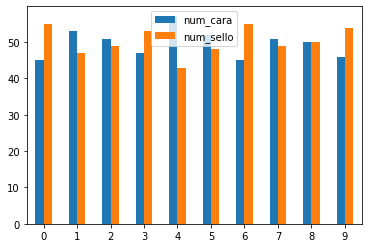

In [ ]:
df.plot.bar(rot=0) #extrae todos los datos del dataframe y le asigna un color diferente a cada columna

'''
Como se puede observar, no hay ninguna observación con resultados 50-50. 
'''

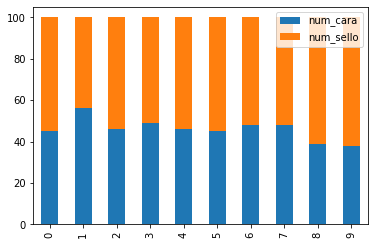

In [ ]:
#Otra presentación
df.plot.bar(stacked=True) #extrae todos los datos del dataframe y le asigna un color diferente a cada columna

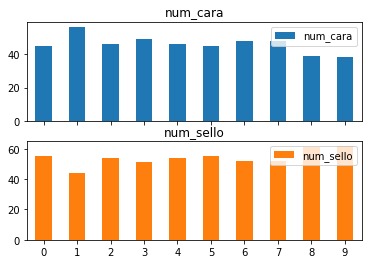

In [ ]:
#Separando los gráficos
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=1)  

# Prueba Chi-cuadrada

* Método estadístico para hacer inferencia sobre la distribución de una variable o decidir si existe una relación entre dos variables de una población. Esta inferencia recae en la curva de la distribución X^2 (chi-cuadrada), que depende del grado de libertad. 



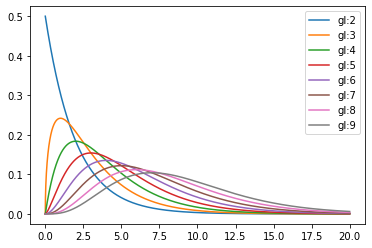

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#rango del eje x, de 0 a 20 en pasos de 0.001
x = np.arange(0,20,0.001)

#gráfico de la distribución chi-cuadrada con 'g' grados de libertad
for g in range(2,10):
  plt.plot(x,stats.chi2.pdf(x,df=g), label=f"gl:{g}")
plt.legend(loc="upper right")
plt.show()

'''
Esta curva es sesgada a la derecha y a medida que el grado de libertada crece, la curva es más similar a
una curva de distribución normal
'''



> Un problema común en aprendizaje de máquina es determinar si los datos de entrada (features) son relevantes respecto al resultado que se quiere predecir. (**Feature selection**). 

* En el caso de problemas de clasificación donde las variables de entrada son también categóricas, se pueden usar pruebas estadísticas para determinar si la variable de salida es dependiente o independiente respecto a las variables de entrada. **Si es independiente, esta variable (input) es candidata para removerse, dada su mínima importancia. 
* En este contexto, la prueba Chi-cuadrada se usa para determinar esta dependencia/independencia. 





* Objetivo: determinar si la distribución de una muestra de datos categóricos sigue una distribución esperada. 

>Ejemplo: determinar si el tipo de ingeniería que estudiaron los miembros de una comunidad (barrio, universidad, ciudad, etc.) siguen la distribución del país entero.

>--> cuando se trabaja con variables categóricas, por sí mismas no aportan mucho a la prueba estadística ya que las categorías ("ing. sistemas", "ing. telecomunicaciones", etc) no tienen significado matemático. En las pruebas, se usan los valores numéricos relacionados a estas variables (**conteo**) 

In [ ]:
'''
Generando datos falsos acerca del tipo de ingeniería que estudiaron los ingenieros de Medellín y Colombia
'''
import numpy as np
import pandas as pd
import scipy.stats as stats

colombia = pd.DataFrame(["sistemas"]*100000+["telecomunicaciones"]*60000+["mecánica"]*50000+["industrial"]*15000+["otra"]*35000)
medellin = pd.DataFrame(["sistemas"]*600+["telecomunicaciones"]*300+["mecánica"]*250+["industrial"]*75+["otra"]*150)

colombia.head() #vistazo al dataframe (primeros valores)

,0
0,sistemas
1,sistemas
2,sistemas
3,sistemas
4,sistemas


In [ ]:
medellin.tail() #vistazo a los últimos valores

,0
1370,otra
1371,otra
1372,otra
1373,otra
1374,otra


In [ ]:
colombia.describe() #Descripción --> como sólo tiene variables categóricas, muestra el conteo, categorías únicas, el valor más repetido y frecuencia

,0
count,260000
unique,5
top,sistemas
freq,100000


In [ ]:
tabla_colombia = pd.crosstab(index=colombia[0], columns="count") #Tabla de frecuencias por defecto (Crosstab)
tabla_medellin = pd.crosstab(index=medellin[0], columns="count") #Tabla de frecuencias por defecto (Crosstab)

print("colombia:")
print(tabla_colombia)
print("")
print("medellín:")
print(tabla_medellin)

colombia:
col_0                count
0                         
industrial           15000
mecánica             50000
otra                 35000
sistemas            100000
telecomunicaciones   60000

medellín:
col_0               count
0                        
industrial             75
mecánica              250
otra                  150
sistemas              600
telecomunicaciones    300


In [ ]:
tabla_colombia

col_0,count
0,
industrial,15000
mecánica,50000
otra,35000
sistemas,100000
telecomunicaciones,60000


* La pregunta que queremos responder es si la distribución de estas dos muestras se puede considerar igual o no


* Estadístico chi-cuadrado:

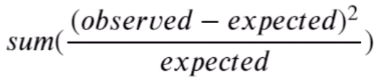

* Los datos observados están representados por el conteo (count) de cada categoría (medellín) y los datos esperados están representados por el conteo desde la distribución base (colombia), manteniendo la proporcionalidad. 




In [ ]:
#observaciones (Medellín)

observados = tabla_medellin
prop_colombia = tabla_colombia/len(colombia) #proporción de la población
print(prop_colombia)

col_0                  count
0                           
industrial          0.057692
mecánica            0.192308
otra                0.134615
sistemas            0.384615
telecomunicaciones  0.230769


In [ ]:
esperados = prop_colombia * len(medellin) #conteos esperados
print(esperados)

col_0                    count
0                             
industrial           79.326923
mecánica            264.423077
otra                185.096154
sistemas            528.846154
telecomunicaciones  317.307692


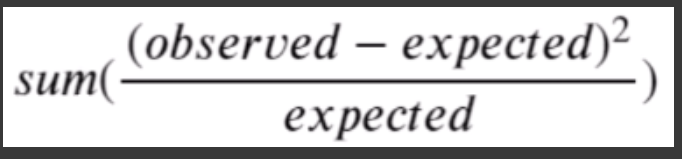

In [ ]:
observados

col_0,count
0,
industrial,75
mecánica,250
otra,150
sistemas,600
telecomunicaciones,300


In [ ]:
esperados

col_0,count
0,
industrial,79.326923
mecánica,264.423077
otra,185.096154
sistemas,528.846154
telecomunicaciones,317.307692


In [ ]:
#estadístico chi-cuadrado
chi_cuadrado = (((observados-esperados)**2)/esperados)
print(chi_cuadrado)

col_0                  count
0                           
industrial          0.236014
mecánica            0.786713
otra                6.654595
sistemas            9.573427
telecomunicaciones  0.944056


In [ ]:
#estadístico chi-cuadrado
chi_cuadrado = (((observados-esperados)**2)/esperados).sum()
print(chi_cuadrado)

col_0
count    18.194805
dtype: float64




> * Se asume que ninguno de los conteos de las esperadas es menor a 5
> * Para determinar si el resultado es significante, en esta prueba usamos un valor crítico basado en la distribución chi-cuadrado. 
> * tabla valor crítico chi-cuadrado: https://statologos.com/tabla-de-distribucion-de-chi-cuadrado/
> * valor p: probabilidad de que un valor estadísticio calculado sea posible dada una hipótesis nula cierta.
> * si el valor p es menor que el nivel de significancia impuesto, se considera como un resultado estadísticamente significativo y, por lo tanto, permite rechazar la hipótesis nula. 
> * significancia estadística: se asume que un resultado es estadísticamente significativo cuando es improbable que haya sido debido al azar.

In [ ]:
import scipy.stats

#Valor crítico para un nivel de confianza del 95% (o 5% de valor de significancia) y cálculo del valor p
#df: número de categorías - 1 (degrees of freedom/grados de libertad)
crit = stats.chi2.ppf(q=0.95, df=4)
#crit = stats.chi2.ppf(q=1-0.05, df=4) #averiguando datos de tabla
print("valor crítico: ", crit)

#Valor p: toda el área debajo de la distribución hasta el punto x=chi_cuadrado
valor_p = 1-stats.chi2.cdf(x=chi_cuadrado, df=4)
print("valor p: ", valor_p)

valor crítico:  9.487729036781154
valor p:  [0.00113047]


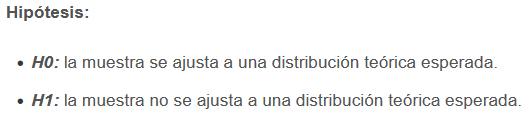

Si el estimador X2 es menor o igual al valor correspondiente en la tabla, entonces, se acepta H0; en caso contrario, se rechaza.

**Análisis**: ya que el estadístico chi-cuadrado excede el valor crítico, se rechaza la hipótesis nula (las dos distribuciones son iguales) y se acepta la hipótesis alternativa (las dos distribuciones no son iguales)

In [ ]:
#Haciendo la prueba directamente con la librería scipy.stats

chi_cuadrado, valor_p = stats.chisquare(f_obs=observados, f_exp=esperados)
print("chi_cuadrado: ", chi_cuadrado[0])
print("valor_p: ", valor_p[0])

chi_cuadrado:  18.194805194805177
valor_p:  0.0011304670928034746


* Aquí puedes profundizar un poco más: https://www.youtube.com/watch?v=ZNXso_riZag
* Algunos ejemplos: https://www.statology.org/chi-square-test-real-life-examples/
* Proceso en Excel: https://www.youtube.com/watch?v=Fi9biLpbRUM
* Otra aplicación: https://www.youtube.com/watch?v=hTsxJqw2zMM (prueba de independencia)

# Prueba Kolmogorov-Smirnov

Es una prueba no paramétrica la cual se emplea solo para distribuciones continuas. Esta tiene como objetivo encontrar el tipo de distribución de una serie de datos, se considera más eficiente que la prueba de chi-cuadrado debido a que trabaja con la distribución de probabilidad acumulada: la distribución acumulada de los datos observados y la distribución acumulada teórica correspondiente al modelo elegido.

* Permite comparar distribuciones e identificar si existen diferencias entre ellas
* se puede determinar si dos variables tienen la misma distribución
* se puede determinar si una misma variable se distribuye de la misma forma en dos grupos

* Se usa para medir la distancia vertical máxima entre las funciones de distribución acumulada empírica de dos muestras o de una muestra y una de referencia.

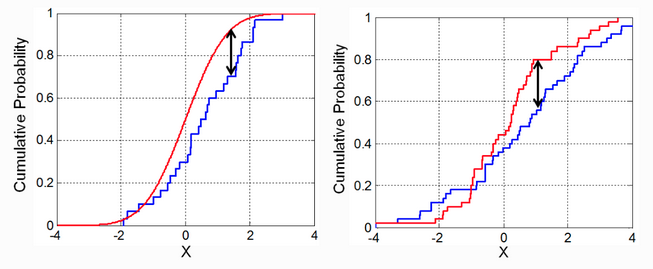

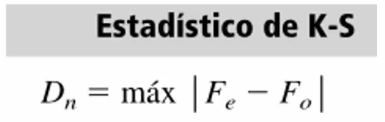

In [ ]:
x = np.linspace(-15,15,9)
x

array([-15.  , -11.25,  -7.5 ,  -3.75,   0.  ,   3.75,   7.5 ,  11.25,
        15.  ])

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats 

x = np.linspace(-15,15,9)
stats.kstest(x,"norm")  #librería prueba kolmogorov-smirnov --> haciendo prueba sobre x para determinar si sigue distribución normal

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014270517116)

In [ ]:
#muestra normal de 100 observaciones
#np.random.seed(987654321) #semilla
x2 = stats.norm.rvs(size=100)
stats.kstest(x2,"norm")

KstestResult(statistic=0.13791310154591135, pvalue=0.04031856750160138)

* Ejemplo: un vendedor tiene que visitar siete cuentas por semana. Se piensa que las ventas pueden describirse mediante una distribución binomial con probabilidad de venta en cada cuenta de 0.45. Determine si la distribución de frecuencias observadas del número de ventas corresponde a una distribución binomial. Use un nivel de significancia de 0.05

In [ ]:
import pandas as pd

num_ventas = [0,1,2,3,4,5,6,7] #Número de ventas por semana (Xi)
frec_ventas = [25,32,61,47,39,21,18,12] #frecuencia de ventas 

#Ho: se ajusta a una distribución binomial
#H1: no se ajusta a una distribución binomial

sig = 0.05 #valor de significancia
n = sum(frec_ventas) #acumulado frecuencia de ventas
k_s = 0.0852 #valor desde la tabla --> buscando n y sig

data = pd.DataFrame({"num_ventas":num_ventas, "frec_ventas":frec_ventas})
data

,num_ventas,frec_ventas
0,0,25
1,1,32
2,2,61
3,3,47
4,4,39
5,5,21
6,6,18
7,7,12


In [ ]:
#frecuencia observada
#agregando una nueva columna
data["f_obs"] = data["frec_ventas"]/data["frec_ventas"].sum() 
data

,num_ventas,frec_ventas,f_obs
0,0,25,0.098039
1,1,32,0.125490
2,2,61,0.239216
3,3,47,0.184314
4,4,39,0.152941
5,5,21,0.082353
6,6,18,0.070588
7,7,12,0.047059


In [ ]:
#frecuencia observada acumulada
data["FO"] = data["f_obs"].cumsum(axis=0)
data

,num_ventas,frec_ventas,f_obs,FO
0,0,25,0.098039,0.098039
1,1,32,0.125490,0.223529
2,2,61,0.239216,0.462745
3,3,47,0.184314,0.647059
4,4,39,0.152941,0.800000
5,5,21,0.082353,0.882353
6,6,18,0.070588,0.952941
7,7,12,0.047059,1.000000


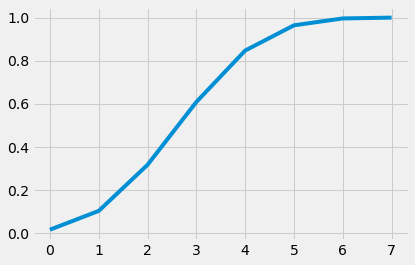

In [ ]:
import scipy.stats as stats

x = stats.binom.cdf([0,1,2,3,4,5,6,7],7,0.45) #7 visitas con prob. de éxito de 0.45
plt.plot(x)

In [ ]:
#frecuencia esperada acumulada
data["FE"] = x
data

,num_ventas,frec_ventas,f_obs,FO,FE,FE-FO
0,0,25,0.098039,0.098039,0.015224,-0.082815
1,1,32,0.125490,0.223529,0.102418,-0.121111
2,2,61,0.239216,0.462745,0.316440,-0.146305
3,3,47,0.184314,0.647059,0.608288,-0.038771
4,4,39,0.152941,0.800000,0.847072,0.047072
5,5,21,0.082353,0.882353,0.964294,0.081941
6,6,18,0.070588,0.952941,0.996263,0.043322
7,7,12,0.047059,1.000000,1.000000,0.000000


In [ ]:
data["FE-FO"] = data["FE"]-data["FO"]
data

,num_ventas,frec_ventas,f_obs,FO,FE,FE-FO
0,0,25,0.098039,0.098039,0.015224,-0.082815
1,1,32,0.125490,0.223529,0.102418,-0.121111
2,2,61,0.239216,0.462745,0.316440,-0.146305
3,3,47,0.184314,0.647059,0.608288,-0.038771
4,4,39,0.152941,0.800000,0.847072,0.047072
5,5,21,0.082353,0.882353,0.964294,0.081941
6,6,18,0.070588,0.952941,0.996263,0.043322
7,7,12,0.047059,1.000000,1.000000,0.000000


In [ ]:
#máximo de la columna teniendo en cuenta valor absoluto
Dn = data["FE-FO"].abs().max() 
print(Dn) #Estadístico K-S

'''
Ahora, comparo este valor con el teórico (tabla) --> 0.0852

Como el valor que encontramos como desviación máxima es 0.14 y 0.14>0.08, así que no se acepta Ho.
Por ende, las ventas no siguen una distribución binomial
'''

0.14630504725796573


'\nAhora, comparo este valor con el teórico (tabla) --> 0.0852\n\nComo el valor que encontramos como desviación máxima es 0.14 y 0.14>0.08, así que no se acepta Ho.\nPor ende, las ventas no siguen una distribución binomial\n'

* A tener en cuenta: si la desviación absoluta máxima es mayor al valor crítico encontrado en la tabla no se acepta la hipótesis nula. Si es menor, no se rechaza la hipótesis nula

[Valores prueba de Kolmogorov-Smirnov](https://iudigital.instructure.com/courses/7587/files/2065466?wrap=1)

In [ ]:
#librería: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html